In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from collections  import Counter
sns.set_palette(sns.diverging_palette(220, 20, n=7))
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../Addprediction/dataset/Ascendeum_Dataset2.csv')

In [3]:
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [4]:
df.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


In [43]:
df.shape

(567291, 17)

In [44]:
df.dtypes

date                        object
site_id                      int64
ad_type_id                   int64
geo_id                       int64
device_category_id           int64
advertiser_id                int64
order_id                     int64
line_item_type_id            int64
os_id                        int64
integration_type_id          int64
monetization_channel_id      int64
ad_unit_id                   int64
total_impressions            int64
total_revenue              float64
viewable_impressions         int64
measurable_impressions       int64
revenue_share_percent        int64
dtype: object

In [7]:
df.isnull().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

In [8]:
df.skew()

site_id                    -0.085324
ad_type_id                  5.363532
geo_id                     -0.187505
device_category_id          0.344716
advertiser_id               3.471212
order_id                   -0.229443
line_item_type_id          -0.108891
os_id                      -6.025209
integration_type_id         0.000000
monetization_channel_id    -0.928288
ad_unit_id                  2.650290
total_impressions          15.181791
total_revenue              25.967215
viewable_impressions       19.384515
measurable_impressions     15.017479
revenue_share_percent       0.000000
dtype: float64

In [1]:
df.kurt()
# use yeojenson/boxcox preprocessing  

NameError: name 'df' is not defined

In [10]:
df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [11]:
for i in df.columns:
    print("{} --> {}  \n \n ".format(i , Counter(df[i])))

date --> Counter({'2019-06-24 00:00:00': 23252, '2019-06-21 00:00:00': 22228, '2019-06-20 00:00:00': 22057, '2019-06-17 00:00:00': 21292, '2019-06-10 00:00:00': 21046, '2019-06-23 00:00:00': 20797, '2019-06-14 00:00:00': 20284, '2019-06-03 00:00:00': 19766, '2019-06-13 00:00:00': 19638, '2019-06-27 00:00:00': 19401, '2019-06-28 00:00:00': 19296, '2019-06-07 00:00:00': 19193, '2019-06-22 00:00:00': 19166, '2019-06-25 00:00:00': 19073, '2019-06-19 00:00:00': 19061, '2019-06-16 00:00:00': 18978, '2019-06-09 00:00:00': 18890, '2019-06-18 00:00:00': 18862, '2019-06-06 00:00:00': 18762, '2019-06-11 00:00:00': 18202, '2019-06-04 00:00:00': 18162, '2019-06-30 00:00:00': 17882, '2019-06-02 00:00:00': 17373, '2019-06-05 00:00:00': 17227, '2019-06-12 00:00:00': 16787, '2019-06-15 00:00:00': 16712, '2019-06-08 00:00:00': 16271, '2019-06-26 00:00:00': 16208, '2019-06-01 00:00:00': 15738, '2019-06-29 00:00:00': 15687})  
 
 
site_id --> Counter({346: 105889, 351: 98499, 350: 89995, 345: 62520, 343: 

total_revenue, total_impressions,ad_unit_id,geo_id,date,viewable_impressions,measurable_impressions

In [12]:
sf = df.drop(['total_revenue', 'total_impressions','ad_unit_id','geo_id','date','viewable_impressions','measurable_impressions'],axis =1)

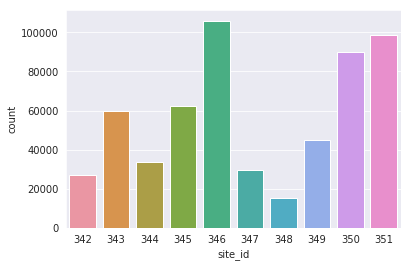

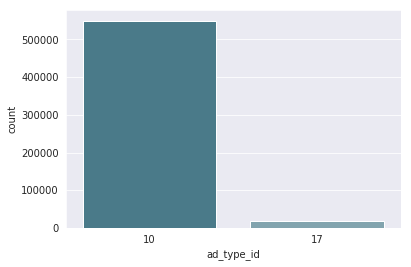

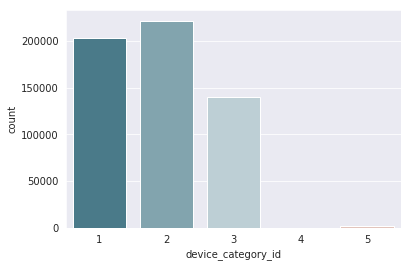

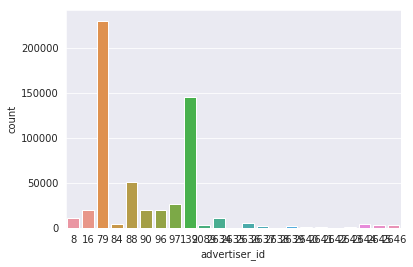

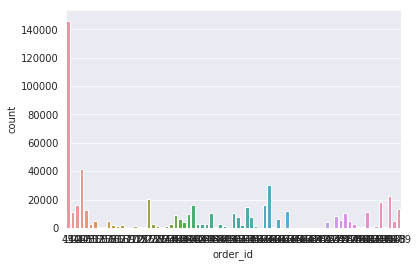

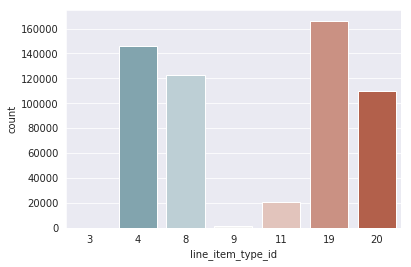

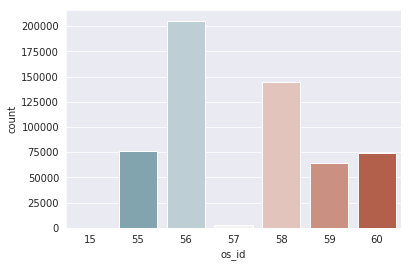

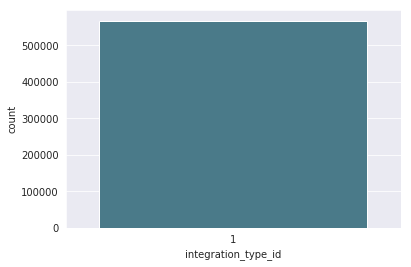

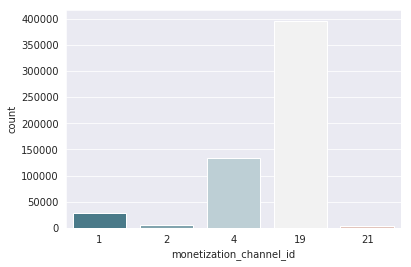

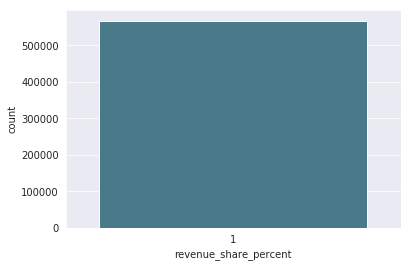

In [13]:
for i in sf.columns:
    sns.countplot(x=i, data=sf)
    plt.show()
    

In [14]:
z = ['total_revenue', 'total_impressions',
     'ad_unit_id','geo_id','date',
     'viewable_impressions','measurable_impressions']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd3e0e5860>,
      dtype=object)

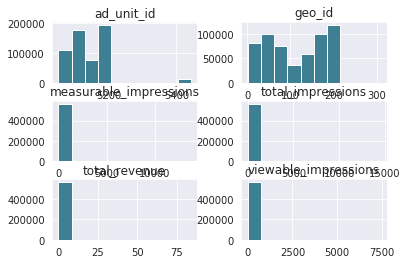

In [15]:
df[z].hist()

In [16]:
df['total_revenue'].values

array([0.    , 0.    , 0.    , ..., 0.0046, 0.012 , 0.024 ])

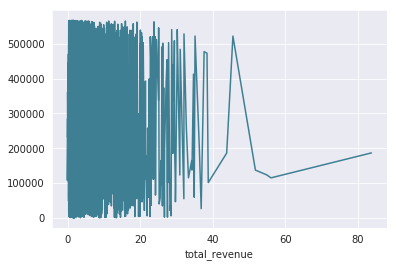

In [17]:
sns.lineplot(x = 'total_revenue' , y = df.index, data =df)
plt.show()

In [22]:
df.groupby('date').count()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
date,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738,15738
2019-06-02 00:00:00,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373,17373
2019-06-03 00:00:00,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766,19766
2019-06-04 00:00:00,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162,18162
2019-06-05 00:00:00,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227
2019-06-06 00:00:00,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762,18762
2019-06-07 00:00:00,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193,19193
2019-06-08 00:00:00,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271,16271
2019-06-09 00:00:00,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890,18890


In [23]:
(df.groupby('measurable_impressions').size()/len(df)).sort_values()

measurable_impressions
13756    0.000002
3112     0.000002
3110     0.000002
3104     0.000002
3098     0.000002
           ...   
8        0.032375
6        0.051935
4        0.099342
2        0.283475
0        0.334855
Length: 1884, dtype: float64

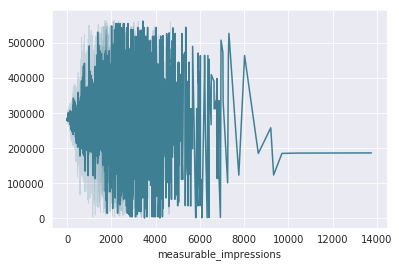

In [20]:
sns.lineplot(x = 'measurable_impressions' , y = df.index, data =df)
plt.show()

In [45]:
df['date'].nunique()

30

In [84]:
df = pd.read_csv('../Addprediction/dataset/Ascendeum_Dataset2.csv')

In [85]:
df.index

RangeIndex(start=0, stop=567291, step=1)

revenue/impressions * 1000.

In [86]:
#df['dummy_cpm'] = (df['total_revenue']/df['total_impressions'])*1000

In [87]:
df.shape

(567291, 17)

In [88]:
target = df.groupby(['site_id','ad_unit_id']).agg(['median']).reset_index()

In [89]:
target

,site_id,ad_unit_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
,,,median,median,median,median,median,median,median,median,median,median,median,median,median,median
0,342,5050,10,122.0,1,79.0,3438.0,19.0,56.0,1,19,2,0.0032,2,2,1
1,342,5051,10,113.0,1,79.0,3438.0,8.0,56.0,1,19,0,0.0000,0,0,1
2,342,5052,10,129.0,1,88.0,163.0,19.0,56.0,1,19,2,0.0018,0,2,1
3,342,5053,10,129.0,1,88.0,172.0,19.0,56.0,1,19,2,0.0022,2,2,1
4,342,5054,10,168.0,3,79.0,3438.0,8.0,59.0,1,19,2,0.0020,0,2,1
5,342,5055,10,131.0,2,79.0,3438.0,19.0,58.0,1,19,2,0.0018,2,2,1
6,342,5056,10,122.0,2,79.0,3438.0,8.0,58.0,1,19,0,0.0000,0,0,1
7,342,5057,10,129.0,1,88.0,162.0,19.0,56.0,1,19,2,0.0022,0,2,1
8,342,5058,10,122.0,2,79.0,3438.0,8.0,58.0,1,19,0,0.0000,0,0,1


In [90]:
columns = ['site_id','ad_unit_id']

# Iterate through the variables names
for var in target.columns.levels[0]:
    # Skip the id name
    if var != 'site_id' and var != 'ad_unit_id':
        
        # Iterate through the stat names
        for median in target.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, median))

In [91]:
target.columns = columns
target.head()

,site_id,ad_unit_id,ad_type_id_median,geo_id_median,device_category_id_median,advertiser_id_median,order_id_median,line_item_type_id_median,os_id_median,integration_type_id_median,monetization_channel_id_median,total_impressions_median,total_revenue_median,viewable_impressions_median,measurable_impressions_median,revenue_share_percent_median
0,342,5050,10,122.0,1,79.0,3438.0,19.0,56.0,1,19,2,0.0032,2,2,1
1,342,5051,10,113.0,1,79.0,3438.0,8.0,56.0,1,19,0,0.0000,0,0,1
2,342,5052,10,129.0,1,88.0,163.0,19.0,56.0,1,19,2,0.0018,0,2,1
3,342,5053,10,129.0,1,88.0,172.0,19.0,56.0,1,19,2,0.0022,2,2,1
4,342,5054,10,168.0,3,79.0,3438.0,8.0,59.0,1,19,2,0.0020,0,2,1


In [92]:
target['cpm_multiindex'] = target['total_revenue_median']/target['total_impressions_median']*1000

In [93]:
ntarget = target[['cpm_multiindex','site_id','ad_unit_id']]

In [94]:
ntarget = ntarget.fillna(0)

In [95]:
ntarget

,cpm_multiindex,site_id,ad_unit_id
0,1.60,342,5050
1,0.00,342,5051
2,0.90,342,5052
3,1.10,342,5053
4,1.00,342,5054
5,0.90,342,5055
6,0.00,342,5056
7,1.10,342,5057
8,0.00,342,5058
9,0.20,342,5059


In [96]:
columns

['site_id',
 'ad_unit_id',
 'ad_type_id_median',
 'geo_id_median',
 'device_category_id_median',
 'advertiser_id_median',
 'order_id_median',
 'line_item_type_id_median',
 'os_id_median',
 'integration_type_id_median',
 'monetization_channel_id_median',
 'total_impressions_median',
 'total_revenue_median',
 'viewable_impressions_median',
 'measurable_impressions_median',
 'revenue_share_percent_median']

In [97]:
df['site_id']

0         351
1         351
2         351
3         351
4         348
         ... 
567286    350
567287    350
567288    350
567289    350
567290    350
Name: site_id, Length: 567291, dtype: int64

In [98]:
ndf = df.merge(ntarget, on = ['site_id','ad_unit_id'] ,how ='inner')

In [99]:
ndf.columns

Index(['date', 'site_id', 'ad_type_id', 'geo_id', 'device_category_id',
       'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
       'integration_type_id', 'monetization_channel_id', 'ad_unit_id',
       'total_impressions', 'total_revenue', 'viewable_impressions',
       'measurable_impressions', 'revenue_share_percent', 'cpm_multiindex'],
      dtype='object')

In [100]:
ndf['date'] = pd.to_datetime(ndf['date'] ,errors='coerce')


In [101]:
from fastai.tabular import add_datepart
import re

In [102]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
#     for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
    
    for n in ('Day', 'Dayofweek'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    #df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [103]:
add_datepart(ndf,'date',drop = True)

In [104]:
ndff = ndf.drop(['line_item_type_id','order_id','revenue_share_percent','integration_type_id','advertiser_id'] ,axis=1)

In [110]:
ndff.to_csv('../Addprediction/dataset/data.csv')